Importy

In [36]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import math
import random
import pickle
from pathlib import Path
from keras.utils.vis_utils import plot_model as plot_model
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

Przygotowanie danych

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
base_data = pd.read_csv("pokemon.csv")
path = Path('/content/drive/My Drive/images')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tworzymy dataframe i zczytujemy unikalne typy oraz nazwy pokemonów

In [3]:
df = pd.read_csv("pokemon.csv")
df.columns
display(df)

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [4]:
df.isnull().any()
df = df.fillna('Brak')
df

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,Brak
4,charmeleon,Fire,Brak
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,Brak
807,meltan,Steel,Brak


In [5]:
type1 = df.Type1.unique()
display(type1)
type2 = df.Type2.unique()
display(type2)

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

array(['Poison', 'Brak', 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

Dodajemy obrazki

In [6]:
img_dir = list(path.glob('*.png'))
len(img_dir)

721

In [7]:
df['Image'] = 0

In [8]:
for i in img_dir:
  name = str(str(i).split('/')[-1:])[2:-6]
  #print(name)
  df.loc[df["Name"] == name, 'Image'] = str(i)

In [9]:
df = df.iloc[:len(img_dir)]

In [10]:
df

,Name,Type1,Type2,Image
0,bulbasaur,Grass,Poison,/content/drive/My Drive/images/bulbasaur.png
1,ivysaur,Grass,Poison,/content/drive/My Drive/images/ivysaur.png
2,venusaur,Grass,Poison,/content/drive/My Drive/images/venusaur.png
3,charmander,Fire,Brak,/content/drive/My Drive/images/charmander.png
4,charmeleon,Fire,Brak,/content/drive/My Drive/images/charmeleon.png
...,...,...,...,...
716,yveltal,Dark,Flying,/content/drive/My Drive/images/yveltal.png
717,zygarde-50,Dragon,Ground,/content/drive/My Drive/images/zygarde-50.png
718,diancie,Rock,Fairy,/content/drive/My Drive/images/diancie.png
719,hoopa-confined,Psychic,Ghost,/content/drive/My Drive/images/hoopa-confined.png


Tworzenie generatorów do trenowania sieci

In [11]:
img_gen = ImageDataGenerator(validation_split = 0.2)
train_gen_type1 = img_gen.flow_from_dataframe(df, x_col='Image', y_col="Type1", subset = 'training')
train_gen_type2 = img_gen.flow_from_dataframe(df, x_col='Image', y_col="Type2", subset = 'training')

Found 577 validated image filenames belonging to 18 classes.
Found 577 validated image filenames belonging to 19 classes.


In [20]:
train_gen_type1.image_shape

(256, 256, 3)

Tworzenie modelu sieci

In [21]:
model = Sequential([
  Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(128, (3, 3), padding='same', activation='relu'),
  Conv2D(128, (3, 3), padding='same', activation='relu'),
  Conv2D(32, (3, 3), padding='same', activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(18, activation='softmax')
])

In [22]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

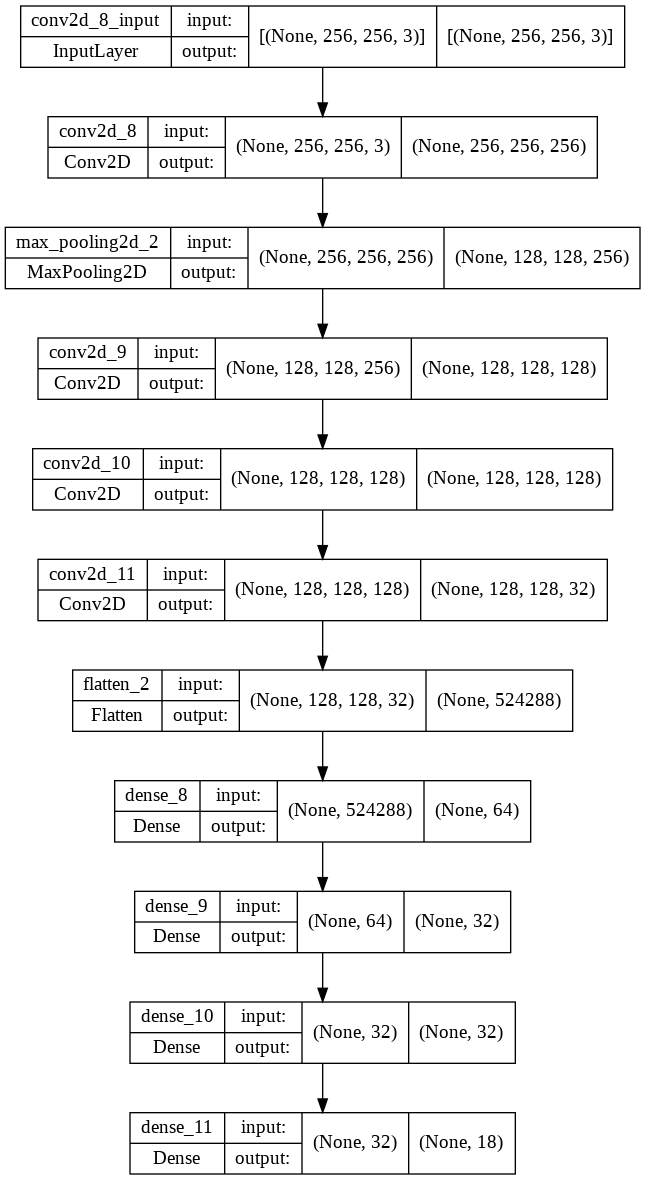

In [23]:
plot_model(model, to_file="model.png", show_shapes=True)

In [25]:
history1 = model.fit(train_gen_type1, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/19 [==============================] - 7s 354ms/step - loss: 2.5654 - accuracy: 0.1906
Epoch 2/25
19/19 [==============================] - 7s 352ms/step - loss: 1.8139 - accuracy: 0.4003
Epoch 3/25
19/19 [==============================] - 7s 364ms/step - loss: 1.0104 - accuracy: 0.7002
Epoch 4/25
19/19 [==============================] - 7s 366ms/step - loss: 0.5596 - accuracy: 0.8388
Epoch 5/25
19/19 [==============================] - 7s 354ms/step - loss: 0.2719 - accuracy: 0.9324
Epoch 6/25
19/19 [==============================] - 7s 354ms/step - loss: 0.1641 - accuracy: 0.9671
Epoch 7/25
19/19 [==============================] - 7s 350ms/step - loss: 0.0752 - accuracy: 0.9861
Epoch 8/25
19/19 [==============================] - 7s 353ms/step - loss: 0.0171 - accuracy: 0.9965
Epoch 9/25
19/19 [==============================] - 7s 353ms/step - loss: 0.0086 - accuracy: 0.9983
Epoch 10/25
19/19 [==============================] - 7s 349ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 11/2

In [28]:
model2 = Sequential([
  Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(128, (3, 3), padding='same', activation='relu'),
  Conv2D(128, (3, 3), padding='same', activation='relu'),
  Conv2D(32, (3, 3), padding='same', activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(19, activation='softmax')
])
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history2 = model2.fit(train_gen_type2, epochs = 25)

Eksport modeli

In [31]:
pickle.dump(model, open("model_type1.sv",'wb'))
pickle.dump(model2, open("model_type2.sv",'wb'))

INFO:tensorflow:Assets written to: ram://195c475f-7a92-429b-a005-9c3d4eba8190/assets
INFO:tensorflow:Assets written to: ram://cd384d54-81d0-4ebe-bdd9-91679d59d3d3/assets


#Wykresy postępów uczenia

##Dla Type1

In [33]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy'])


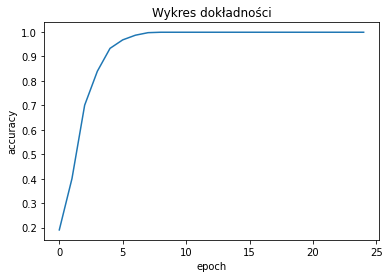

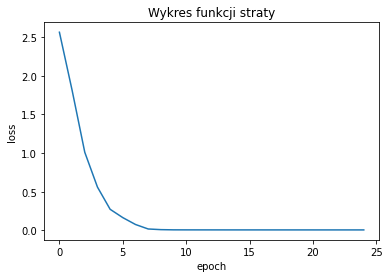

In [34]:
plt.plot(history1.history['accuracy'])
plt.title('Wykres dokładności')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(history1.history['loss'])
plt.title('Wykres funkcji straty')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

##Dla Type2

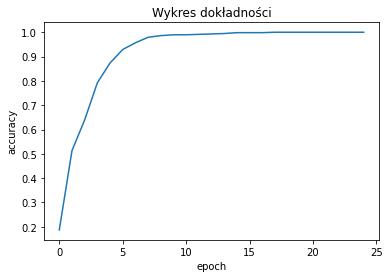

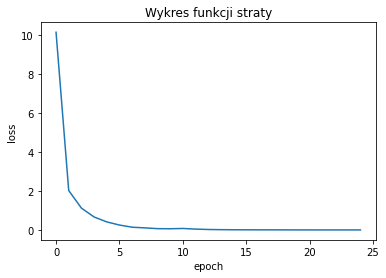

In [35]:
plt.plot(history2.history['accuracy'])
plt.title('Wykres dokładności')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(history2.history['loss'])
plt.title('Wykres funkcji straty')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Confusion Matrix

##Type2

In [37]:
val_gen_type2 = img_gen.flow_from_dataframe(df, x_col='Image', y_col="Type2", subset = 'validation')

Found 144 validated image filenames belonging to 19 classes.


In [49]:
Y_pred2 = model2.predict_generator(val_gen_type2, 170 // 32)
y_pred2 = np.argmax(Y_pred2, axis=1)
print(confusion_matrix(val_gen_type2.classes, y_pred2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[[68  0  3  2  0  1  3  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  1  0  0  0  1  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  1  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 4  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]]


##Type1

In [44]:
val_gen_type1 = img_gen.flow_from_dataframe(df, x_col='Image', y_col="Type1", subset = 'validation')

Found 144 validated image filenames belonging to 18 classes.


In [50]:
Y_pred = model.predict_generator(val_gen_type1, 170 // 32)
y_pred = np.argmax(Y_pred, axis=1)
print(confusion_matrix(val_gen_type2.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[[ 7  1  2  4  1  2  7  0  2 10  2 24  1  5  5  1  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  2  1  0  3  0  4  1  1  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  3  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  2  2  8  1  2  2  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  1  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  2